# 1. Data Import & Cleaning

In [2]:
import pandas as pd

# Import the data
df = pd.read_csv("../classification/labelled_posts.csv")

# Drop reposts (i.e. engagement & comments = 0)
no_reposts_df = df[(df['engagement'] != 0) | (df['comments'] != 0)].copy()
df.shape, no_reposts_df.shape

((416, 4), (381, 4))

# 2. Data Visualization

/Users/kyurikotpq/miniconda3/envs/ML_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyurikotpq/miniconda3/envs/ML_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyurikotpq/miniconda3/envs/ML_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


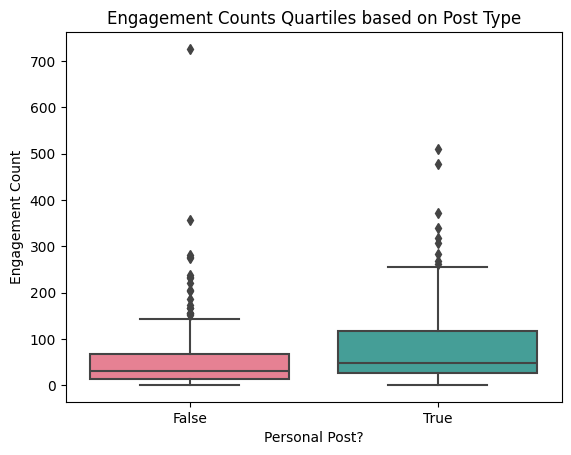

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of density
sns.boxplot(data=no_reposts_df, x="personal_exp",
            y="engagement", palette="husl")

plt.xlabel("Personal Post?")
plt.ylabel("Engagement Count")
plt.title("Engagement Counts Quartiles based on Post Type")
plt.show()


# 3. Data Analysis

In [17]:
from scipy.stats import mannwhitneyu

# Split the datasets
personal_df_eng = no_reposts_df[no_reposts_df["personal_exp"]]["engagement"]
non_personal_df_eng = no_reposts_df[no_reposts_df["personal_exp"]
                                    == False]["engagement"]

# Calculate the test statistic, U1
U_personal_stat, p = mannwhitneyu(personal_df_eng, non_personal_df_eng)

nx, ny = personal_df_eng.shape[0], non_personal_df_eng.shape[0]
U_non_personal_stat = nx*ny - U_personal_stat

# Calculate the effect size
# Ref: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test#Rank-biserial_correlation
U = min(U_personal_stat, U_non_personal_stat)
effect_size = 1 - (2*U)/(nx * ny)


# #descriptivestats: Calculate mean and median
print("Post Engagement Statistics")
print("--------------------------")
print(f"{nx} Personal posts:")
print("mode\t", personal_df_eng.mode().tolist())
print(personal_df_eng.describe())
print("--> U-Statistic:", U_personal_stat)
print("")
print(f"{ny} Non-Personal posts:")
print("mode\t", non_personal_df_eng.mode().tolist())
print(non_personal_df_eng.describe())
print("- U-Statistic:", U_non_personal_stat)
print("")

# # Check the p-value
if p < 0.05:
    print(f"There is a statistically significant difference between the groups.", "\n",
          f"- p = {p} < 0.05\n",
          f"- effect size = {effect_size}",
          )
else:
    print("There is no statistically significant difference between the groups.")


Post Engagement Statistics
--------------------------
113 Personal posts:
mode	 [18]
count    113.00000
mean      90.00885
std       97.39211
min        1.00000
25%       26.00000
50%       49.00000
75%      118.00000
max      509.00000
Name: engagement, dtype: float64
--> U-Statistic: 19566.5

268 Non-Personal posts:
mode	 [2]
count    268.000000
mean      52.544776
std       70.361944
min        1.000000
25%       12.750000
50%       31.000000
75%       67.000000
max      726.000000
Name: engagement, dtype: float64
- U-Statistic: 10717.5

There is a statistically significant difference between the groups. 
 - p = 6.599151704860257e-06 < 0.05
 - effect size = 0.29220050191520275
